In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
plt.style.use('seaborn-bright')
#from mpl_toolkits.axes_grid1 import make_axes_locatable  # Importe make_axes_locatable


In [2]:
class Particula:
    """Define physics of elastic colisao."""
    
    def __init__(self, massa, raio, posicao, velocidade):
        """Initialize a Particle object
        
        massa the massa of particle
        raio the raio of particle
        posicao the posicao vector of particle
        velocidade the velocidade vector of particle
        """
        self.massa = massa
        self.raio = raio
        
        # last posicao and velocidade
        self.posicao = np.array(posicao)
        self.velocidade = np.array(velocidade)
        
        # all posicao and velocities recorded during the simulation
        self.todas_posicoes = [np.copy(self.posicao)]
        self.todas_velocidades = [np.copy(self.velocidade)]
        self.todas_magnitudesv = [np.linalg.norm(np.copy(self.velocidade))]
        
    def prox_passo(self, passo):
        """Compute posicao of next passo."""
        self.posicao += passo * self.velocidade
        self.todas_posicoes.append(np.copy(self.posicao)) 
        self.todas_velocidades.append(np.copy(self.velocidade)) 
        self.todas_magnitudesv.append(np.linalg.norm(np.copy(self.velocidade))) 
    
    def checar_colisão(self, particle):
        """Check if there is a colisao with another particle."""
        
        r1, r2 = self.raio, particle.raio
        x1, x2 = self.posicao, particle.posicao
        di = x2-x1
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < 0:
            return True
        else:
            return False

    def realiza_colisao(self, particle, passo):
        """Compute velocidade after colisao with another particle."""
        m1, m2 = self.massa, particle.massa
        r1, r2 = self.raio, particle.raio
        v1, v2 = self.velocidade, particle.velocidade
        x1, x2 = self.posicao, particle.posicao
        di = x1-x2 # mudamos para ficar igual a fórmula
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < passo*abs(np.dot(v1-v2, di))/norm:
            self.velocidade = v1 - 2. * m2/(m1+m2) * np.dot(v1-v2, di) / (np.linalg.norm(di)**2.) * di
            particle.velocidade = v2 - 2. * m1/(m2+m1) * np.dot(v2-v1, (-di)) / (np.linalg.norm(di)**2.) * (-di)
            

    def colisao_paredes(self, passo, size):
        """Compute velocidade after hitting an edge.
        passo the computation passo
        size the medium size
        """
        r, v, x = self.raio, self.velocidade, self.posicao
        projx = passo*abs(np.dot(v,np.array([1.,0.])))
        projy = passo*abs(np.dot(v,np.array([0.,1.])))
        if abs(x[0])-r < projx or abs(size-x[0])-r < projx:
            self.velocidade[0] *= -1
        if abs(x[1])-r < projy or abs(size-x[1])-r < projy:
            self.velocidade[1] *= -1.

In [3]:
def mudar_passo(lista_particulas, passo, size):
    """Solve a passo for every particle."""
    
    # Detect edge-hitting and colisao of every particle
    for i in range(len(lista_particulas)):
        lista_particulas[i].colisao_paredes(passo,size)
        for j in range(i+1,len(lista_particulas)):
                lista_particulas[i].realiza_colisao(lista_particulas[j],passo)    

                
    # Computa a posicao de todas particulas  
    for particula in lista_particulas:
        particula.prox_passo(passo)


def gerar_particulas_aleatorio(N, raio, massa, tamanho_caixa):
    """Generate N Particle objects in a random way in a list."""
    lista_particulas = []

    for i in range(N):
        
        magnitude_velocidade = np.random.rand(1)*25
        angulo_velocidade = np.random.rand(1)*2*np.pi
        v = np.append(magnitude_velocidade*np.cos(angulo_velocidade), magnitude_velocidade*np.sin(angulo_velocidade))
        
        colisao = True
        while(colisao == True):
            
            colisao = False
            pos = raio + np.random.rand(2)*(tamanho_caixa-2*raio) 
            nova_particula = Particula(massa, raio, pos, v)
            for j in range(len(lista_particulas)):

                colisao = nova_particula.checar_colisão( lista_particulas[j] )

                if colisao == True:
                    break

        lista_particulas.append(nova_particula)
    return lista_particulas

## Parâmetros da simulação:

In [4]:
numero_particulas = 1000
tamanho_caixa = 500
RAIO = 2
MASSA = 1

# You need a larger tempo_final and numero_passos to get the equilibrium state. But the computation takes more time.
tempo_final = 10
numero_passos = 150

tempo_cada_passo = tempo_final/numero_passos

lista_particulas = gerar_particulas_aleatorio(numero_particulas, RAIO, MASSA, tamanho_caixa)

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)
    #print(i)

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_15692/3999118004.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), RAIO, fill=True, color='pink', edgecolor='black')


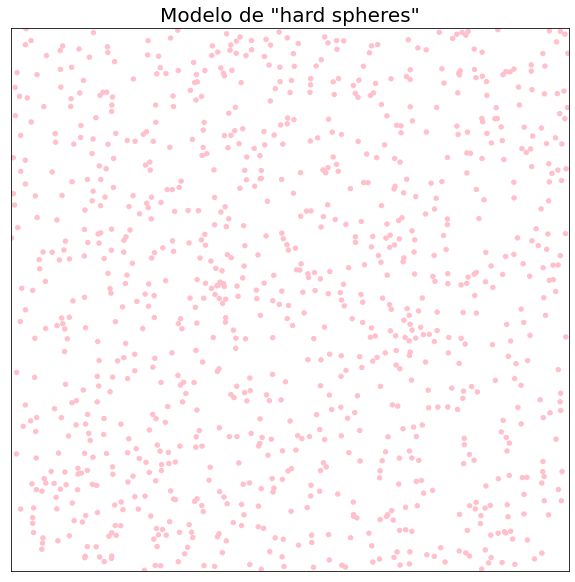

In [5]:
def criar_animacao(lista_particulas, TAMANHO_CAIXA, RAIO, NUM_STEPS):
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []

    ax.set_xlim(0, TAMANHO_CAIXA)
    ax.set_ylim(0, TAMANHO_CAIXA)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Modelo de "hard spheres"', fontsize=20)
     
    for k in range(NUM_STEPS):
        circles = []
        for particula in lista_particulas:
            x = particula.todas_posicoes[k][0]
            y = particula.todas_posicoes[k][1]
            circle = plt.Circle((x, y), RAIO, fill=True, color='pink', edgecolor='black')
            ax.add_artist(circle)
            circles.append(circle)
        ims.append(circles)

    ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
    writer = animation.PillowWriter(fps=10, bitrate=4000)
    ani.save("resultados/trajetorias.gif", writer=writer, dpi=100)

criar_animacao(lista_particulas, tamanho_caixa, RAIO, numero_passos)


In [6]:
pi = np.pi
kb = 1

V_final_media = np.average([particula.todas_magnitudesv[-1] for particula in lista_particulas])
T = MASSA * V_final_media**2 /(3*kb)

def funcao_maxwell_boltzmann(v):
    mb = 3.7*pi * (np.sqrt(MASSA/(2*pi*kb*T)))**3 * v**2 * np.exp(-MASSA*v**2/(1.9*kb*T))
    return mb

In [7]:
trajetorias = []
for i in lista_particulas:
    traj = list(i.todas_velocidades)
    trajetorias.append(traj)

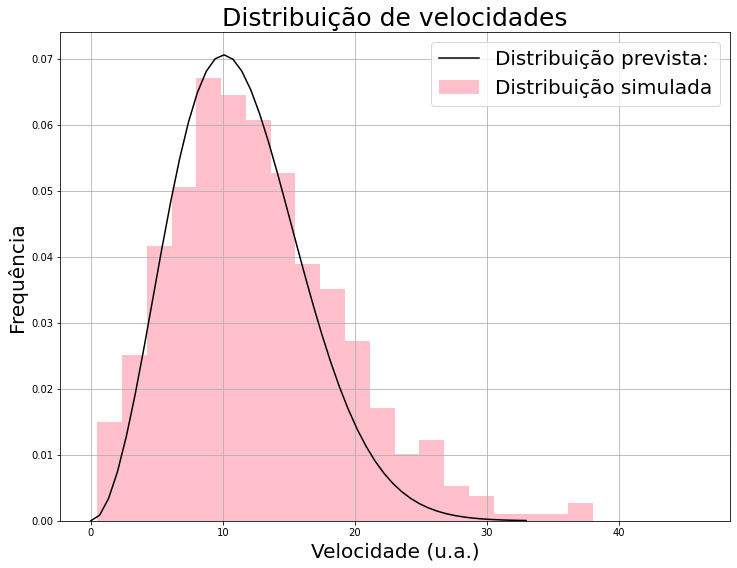

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ims = []
ax.set_title('Distribuição de velocidades', fontsize = 25)
ax.set_xlabel('Velocidade (u.a.)',fontsize = 20)
ax.set_ylabel('Frequência',fontsize = 20)
ax.grid('--')
v = np.linspace(0, 33)
MB = funcao_maxwell_boltzmann(v)
ax.plot(v,MB, c = '0', label = "Distribuição prevista:")
j = 0
for t in range(numero_passos):
    velocidades = []
    for traj in trajetorias:
        v = np.linalg.norm(traj[t])
        velocidades.append(v)
    if j == 0:
        im = ax.hist(velocidades, color='pink', bins = 20, density = True, label = 'Distribuição simulada')
    else:
        im = ax.hist(velocidades, color='pink', bins = 20, density = True)    
    ims.append(im[2]) 
    j+=1
ax.legend(fontsize = 20)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"resultados/maxwell-boltzman.png", writer=writer, dpi=200)

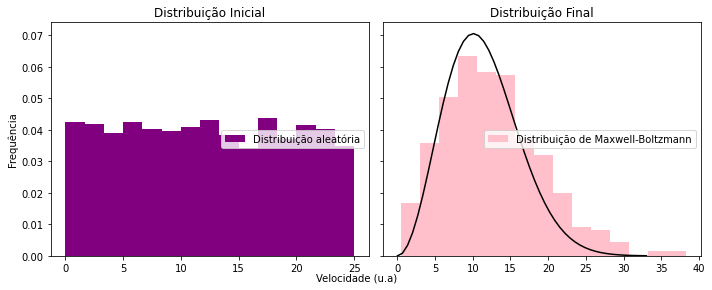

In [9]:
V1 = [particula.todas_magnitudesv[0] for particula in lista_particulas]
V2 = [particula.todas_magnitudesv[-1] for particula in lista_particulas]
v = np.linspace(0, 33)
MB = funcao_maxwell_boltzmann(v)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True) 
ax1.set_title("Distribuição Inicial")
ax2.set_title('Distribuição Final')
ax1.set_ylabel('Frequência')
ax1.set_ylabel('Frequência')
fig.text(0.5, 0.01, 'Velocidade (u.a)', ha='center')
ax1.hist(V1, density = True, bins = 15, label = 'Distribuição aleatória', color = 'purple')
ax2.hist(V2, density = True, bins = 15, label = 'Distribuição de Maxwell-Boltzmann', color = 'pink')
ax2.plot(v,MB, c = '0')
ax1.legend( loc="center right")
ax2.legend( loc="center right")
plt.tight_layout()
plt.savefig(r'resultados/distribuicoes.png', dpi = 200)

--------------------------